In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.model_selection import train_test_split

In [2]:
df_human = pd.read_csv('human.csv')
df_spoof = pd.read_csv('spoof.csv')

df_human = df_human.drop(['Unnamed: 0'], axis=1)
df_spoof = df_spoof.drop(['Unnamed: 0'], axis=1)

df_spoof['label'] = 0
df_human['label'] = 1

df = pd.concat([df_spoof[:10_000], 
                df_human[:10_000]])

df = df.sample(frac=1)
df = df.set_index('file_name')

In [5]:
df

,chroma_stft_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,...,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,label
file_name,,,,,,,,,,,,,,,,,,,,,
human_09622.wav,0.438634,1692.337925,1476.941509,3462.606005,0.086163,-383.093872,144.157242,-53.950050,61.467678,-16.187912,...,0.841438,0.639188,-4.614103,5.698951,3.064393,-3.164270,2.829667,-1.902277,2.920826,1
human_01766.wav,0.411521,1627.772757,1944.319532,3965.171436,0.061582,-431.817780,103.918633,-3.663298,47.018997,-12.661162,...,-8.461233,5.443614,-11.286157,9.166432,-5.195764,-5.634633,-3.561254,0.328604,-3.200920,1
human_02717.wav,0.497872,2128.119978,1563.980960,3616.761348,0.154731,-472.187378,123.275078,-45.591858,10.861918,-36.583618,...,-4.311679,5.645285,-12.460216,6.310933,-6.212319,-1.314728,-3.958495,0.181901,-4.496656,1
human_07169.wav,0.337325,1294.668496,1399.813604,2618.023400,0.055931,-361.102509,151.622330,-35.003246,47.025856,-24.458454,...,-2.211644,-2.659851,-2.594393,8.339713,-13.969396,4.841209,-1.522740,-5.584535,-4.362001,1
spoof_14287.wav,0.384944,1534.785139,1525.977963,3118.399325,0.083114,-326.172974,140.538223,-11.813773,51.203003,-6.207704,...,-6.468420,5.114681,-11.522888,2.648403,-8.535774,-0.039155,-6.122769,-2.633783,0.406500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spoof_16280.wav,0.389243,1487.983264,1577.887451,3345.107550,0.060808,-299.207947,139.430084,-34.979507,72.203667,-2.834321,...,6.776139,3.556754,-6.941968,8.772415,-6.118823,1.422006,-5.246864,1.154776,-0.251673,0
human_01817.wav,0.322253,1590.523723,1031.165201,2481.551289,0.127032,-279.694519,149.285767,-83.174019,6.919315,20.023605,...,-10.556104,-9.591214,6.528703,-0.408336,-4.033393,3.601879,7.195728,2.629463,2.525048,1
spoof_27357.wav,0.329002,1160.802772,1311.476102,2180.983406,0.067989,-240.747635,154.210632,-3.807479,54.755352,-7.430221,...,-3.638926,-1.287169,-5.899618,6.676795,-6.920496,-1.039459,-3.577562,-3.151623,-7.662293,0


In [3]:
from sklearn.preprocessing import StandardScaler


X = df.drop(['label'], axis=1).values
y = df['label'].values

X = StandardScaler().fit_transform(X)

SPLIT = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=SPLIT)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [22]:
# Make model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid'))

# opt = Adam(learning_rate=0.0005)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    batch_size=128,
    epochs=20
)

Epoch 1/20
77/77 [==============================] - 1s 6ms/step - loss: 0.5644 - accuracy: 0.6828 - val_loss: 0.3175 - val_accuracy: 0.8681
Epoch 2/20
77/77 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.8470 - val_loss: 0.2512 - val_accuracy: 0.8981
Epoch 3/20
77/77 [==============================] - 0s 5ms/step - loss: 0.2948 - accuracy: 0.8722 - val_loss: 0.2231 - val_accuracy: 0.9133
Epoch 4/20
77/77 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.8867 - val_loss: 0.1999 - val_accuracy: 0.9214
Epoch 5/20
77/77 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.9011 - val_loss: 0.1882 - val_accuracy: 0.9288
Epoch 6/20
77/77 [==============================] - 0s 5ms/step - loss: 0.2194 - accuracy: 0.9104 - val_loss: 0.1775 - val_accuracy: 0.9305
Epoch 7/20
77/77 [==============================] - 0s 5ms/step - loss: 0.2038 - accuracy: 0.9159 - val_loss: 0.1577 - val_accuracy: 0.9405
Epoch 8/20
77/77 [==

<ipython-input-19-f9336ec38713>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


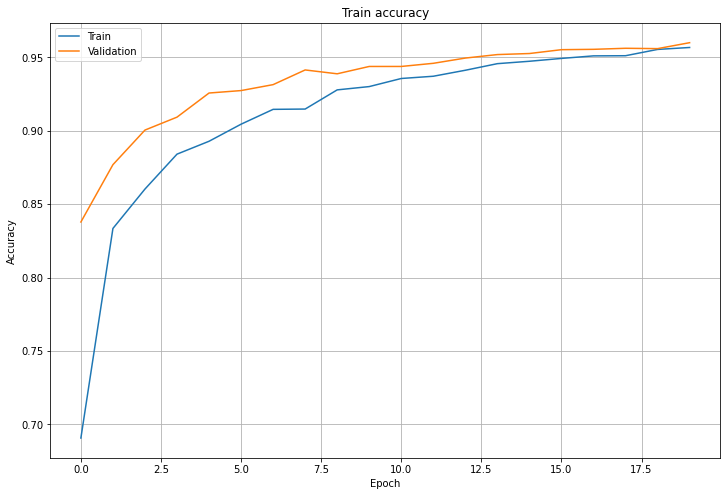

In [19]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Train accuracy')
ax.legend(['Train', 'Validation'])
ax.grid()
f.show()

<ipython-input-20-aa713a2c38cd>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


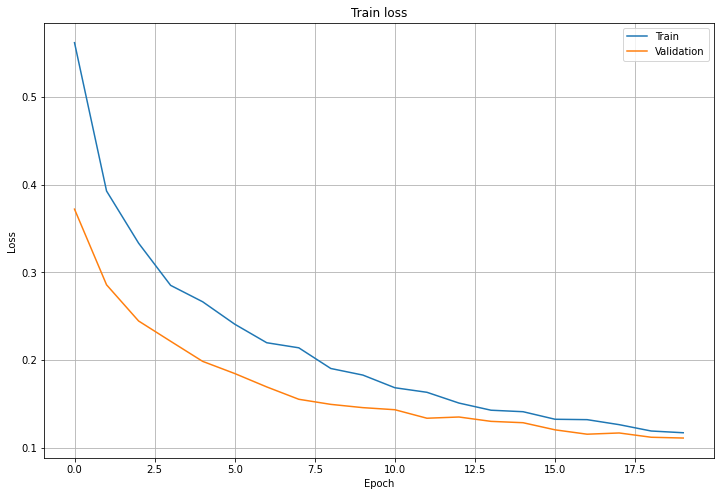

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train loss')
ax.legend(['Train', 'Validation'])
ax.grid()
f.show()

In [136]:
def save_model(model):
    model.save('nn.h5')

In [11]:
from sklearn.metrics import log_loss, accuracy_score, precision_score, \
    recall_score, f1_score, roc_curve, auc

In [9]:
# Metrics on test data
def do_test(model):
    res = pd.DataFrame()

    y_score = model.predict(X_test)
    res['true'] = y_test
    res['score_spoof'] = y_score[:, 0]
    res['score_human'] = y_score[:, 1]
    res['is_human'] = (res.score_human > res.score_spoof).astype('uint8')

    accuracy = accuracy_score(y_test, res.is_human)
    precision = precision_score(y_test, res.is_human)
    recall = recall_score(y_test, res.is_human)
    f_score = f1_score(y_test, res.is_human)

    logloss = log_loss(y_test, y_score)
    fpr, tpr, thrs = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)

    print('accuracy: {}'.format(accuracy))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('f_score: {}'.format(f_score))
    print('logloss: {}'.format(logloss))
    print('auc: {}'.format(roc_auc))

    f, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.scatter(fpr, tpr)
    ax.plot([0, 1], [0, 1])
    ax.grid()
    ax.set_title('ROC-curve')
    
    print(model.evaluate(X_test, y_test))
    
    return res

accuracy: 0.9438333333333333
precision: 0.9462257849031396
recall: 0.9415088069125955
f_score: 0.9438614026320172
logloss: 0.14686538917282993
auc: 0.9867151026581461


,true,score_spoof,score_human,is_human
0,1,0.001487,0.998513,1
1,0,0.675849,0.324151,0
2,1,0.001347,0.998653,1
3,0,0.995959,0.004041,0
4,0,0.974656,0.025343,0
...,...,...,...,...
5995,1,0.046156,0.953844,1
5996,1,0.003275,0.996725,1
5997,1,0.003864,0.996136,1
5998,1,0.003795,0.996205,1


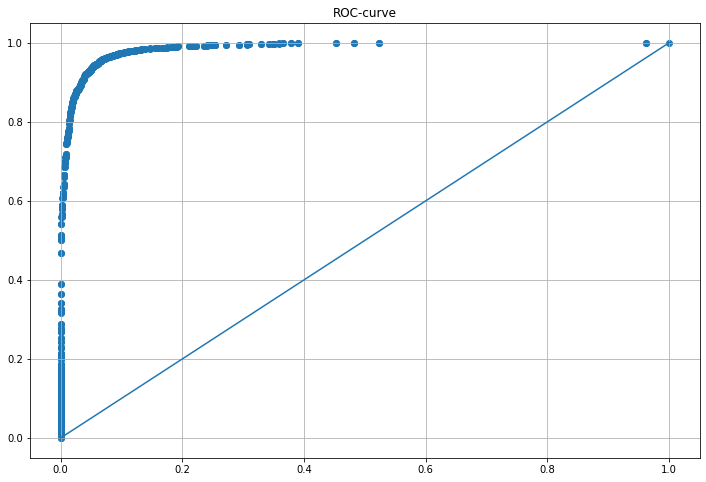

In [125]:
do_test(model)

accuracy: 0.9463333333333334
precision: 0.9444260668210387
recall: 0.9488202060485211
f_score: 0.9466180371352785
logloss: 0.18722770904614966
auc: 0.9858955397265241
188/188 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.9463
[0.15051084756851196, 0.9463333487510681]


,true,score_spoof,score_human,is_human
0,1,0.061554,0.955528,1
1,0,0.467940,0.433347,0
2,1,0.003367,0.996937,1
3,0,0.936530,0.056424,0
4,0,0.880729,0.133725,0
...,...,...,...,...
5995,1,0.264680,0.807302,1
5996,1,0.039784,0.964114,1
5997,1,0.080182,0.975217,1
5998,1,0.079904,0.926336,1


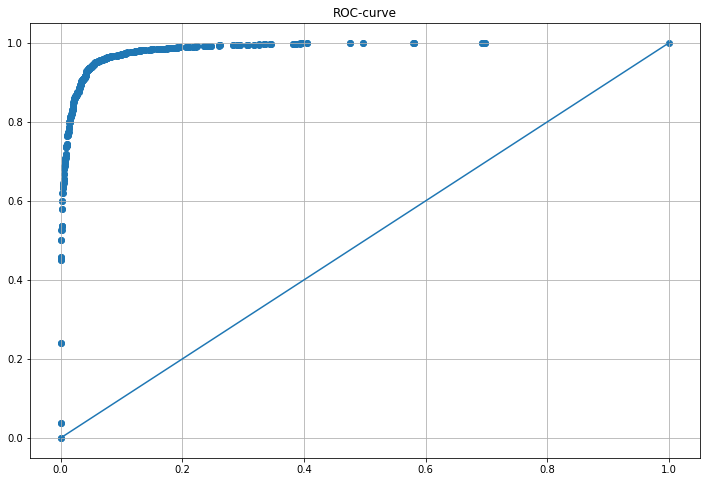

In [131]:
do_test(model)

accuracy: 0.9496666666666667
precision: 0.9498172150216019
recall: 0.9498172150216019
f_score: 0.9498172150216019
logloss: 0.16635065621433054
auc: 0.9882307829659356
188/188 [==============================] - 0s 983us/step - loss: 0.1388 - accuracy: 0.9497
[0.13878321647644043, 0.9496666789054871]


,true,score_spoof,score_human,is_human
0,1,0.016545,0.976894,1
1,0,0.615400,0.341064,0
2,1,0.001760,0.996714,1
3,0,0.923281,0.057996,0
4,0,0.937763,0.062070,0
...,...,...,...,...
5995,1,0.187273,0.801519,1
5996,1,0.023383,0.957994,1
5997,1,0.041318,0.959013,1
5998,1,0.020754,0.972491,1


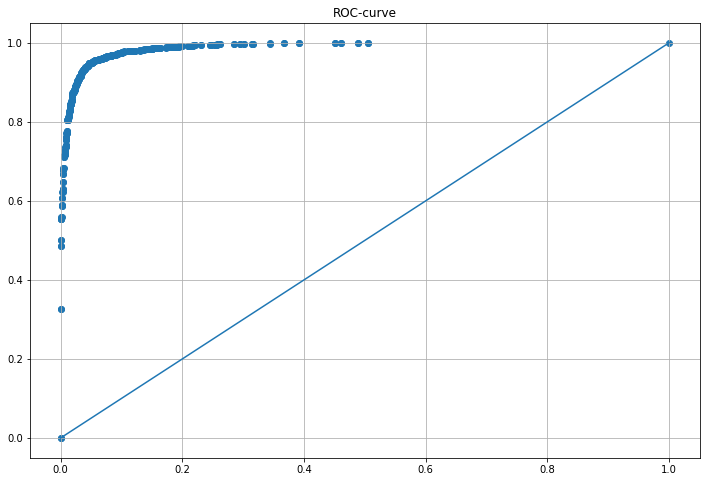

In [135]:
do_test(model)

In [142]:
save_model(model)

accuracy: 0.9526666666666667
precision: 0.9452997052079921
recall: 0.961038961038961
f_score: 0.953104359313078
logloss: 0.13635418708116828
auc: 0.9909501020612131
188/188 [==============================] - 0s 959us/step - loss: 0.1234 - accuracy: 0.9527
[0.12341245263814926, 0.9526666402816772]


,true,score_spoof,score_human,is_human
0,1,0.244407,0.670388,1
1,1,0.001374,0.982948,1
2,1,0.010536,0.947696,1
3,1,0.000491,0.992629,1
4,1,0.016164,0.926541,1
...,...,...,...,...
5995,1,0.017622,0.943926,1
5996,0,0.938994,0.055028,0
5997,1,0.021000,0.917005,1
5998,0,0.847733,0.150709,0


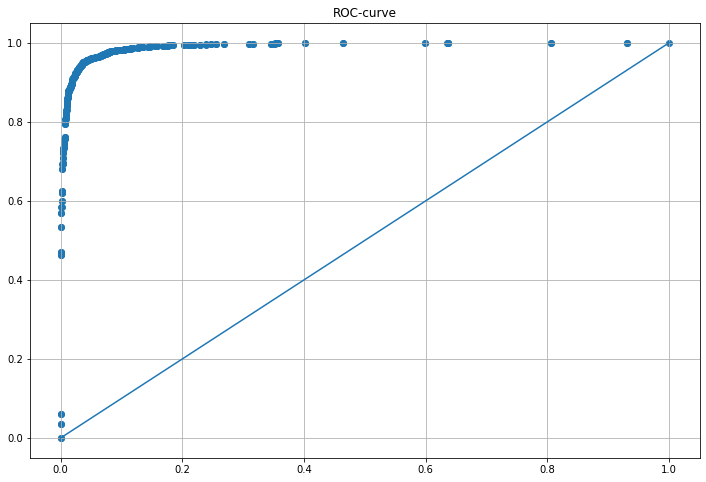

In [12]:
do_test(model)

accuracy: 0.9566666666666667
precision: 0.9619400471539239
recall: 0.951048951048951
f_score: 0.956463496316142
logloss: 0.15212157998657963
auc: 0.9908605464161019
188/188 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9567
[0.12251821905374527, 0.9566666483879089]


,true,score_spoof,score_human,is_human
0,1,0.261447,0.784428,1
1,1,0.045499,0.963700,1
2,1,0.029599,0.977980,1
3,1,0.000793,0.999603,1
4,1,0.152191,0.860458,1
...,...,...,...,...
5995,1,0.026733,0.979306,1
5996,0,0.956329,0.115222,0
5997,1,0.090589,0.919609,1
5998,0,0.926628,0.160245,0


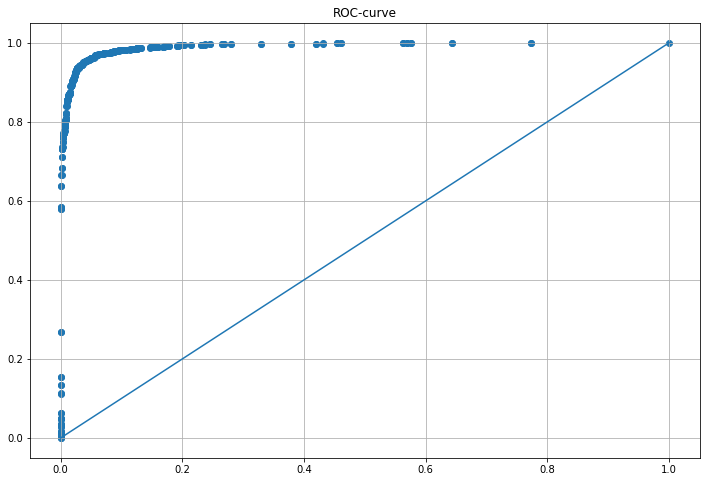

In [17]:
do_test(model)

accuracy: 0.9535
precision: 0.952191235059761
recall: 0.955044955044955
f_score: 0.9536159600997506
logloss: 0.15957542439079672
auc: 0.9911308800197689
188/188 [==============================] - 0s 1ms/step - loss: 0.1221 - accuracy: 0.9535
[0.12212757021188736, 0.953499972820282]


,true,score_spoof,score_human,is_human
0,1,0.320946,0.640975,1
1,1,0.019045,0.962844,1
2,1,0.022628,0.958547,1
3,1,0.000982,0.996853,1
4,1,0.178581,0.784497,1
...,...,...,...,...
5995,1,0.018037,0.965895,1
5996,0,0.962462,0.216319,0
5997,1,0.073595,0.892509,1
5998,0,0.930129,0.246532,0


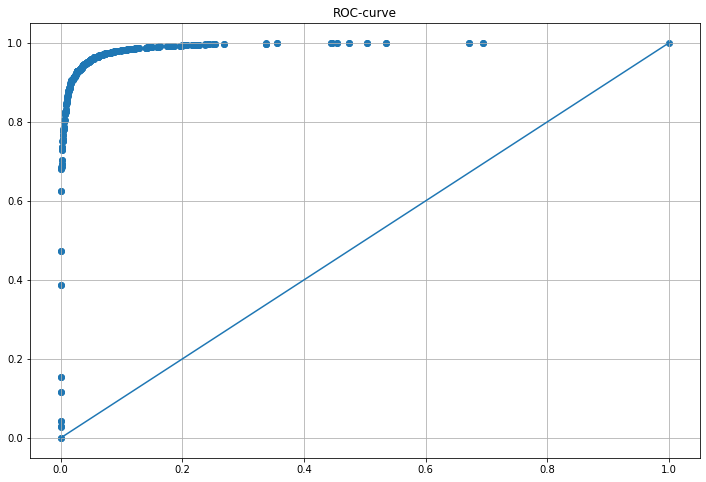

In [21]:
do_test(model)

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               6656      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                